# Color maps of UV-CDAT<a id='top' class="tocSkip"> </a>

Grep all available color maps and visualize them using EzTemplate

© The CDAT software was developed by LLNL. This tutorial was written by Charles Doutriaux and Jiwoo Lee (2017). This work was performed under the auspices of the U.S. Department of Energy by Lawrence Livermore National Laboratory under Contract DE-AC52-07NA27344.

[Download the Jupyter Notebook](Colormap_Tutorial.ipynb)


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-modules" data-toc-modified-id="Import-modules-1">Import modules</a></span></li><li><span><a href="#Prepare-a-dummy-array" data-toc-modified-id="Prepare-a-dummy-array-2">Prepare a dummy array</a></span></li><li><span><a href="#Colormap-visualizing-function" data-toc-modified-id="Colormap-visualizing-function-3">Colormap visualizing function</a></span></li><li><span><a href="#Open-a-VCS-canvas" data-toc-modified-id="Open-a-VCS-canvas-4">Open a VCS canvas</a></span></li><li><span><a href="#VCS-colormaps" data-toc-modified-id="VCS-colormaps-5">VCS colormaps</a></span></li><li><span><a href="#Matplotlib-colormaps-in-VCS" data-toc-modified-id="Matplotlib-colormaps-in-VCS-6">Matplotlib colormaps in VCS</a></span></li></ul></div>

# Import modules
[Back to Top](#top)

In [1]:
import vcs, EzTemplate
import MV2
import numpy as np

# Prepare a dummy array
[Back to Top](#top)
- We need a 2-D dummy array that will contain monotonically increasing numbers each of two rows, to be used for the visualization

In [2]:
a=[]
num_levels = 224

for i in range(0,num_levels):
  a.append(i/float(num_levels))

for i in range(0,num_levels):
  a.append(i/float(num_levels))

a = MV2.array(a)
a = MV2.reshape(a, (-1,num_levels))

# Colormap visualizing function
[Back to Top](#top)

- Below function will visualize given colormaps to provide a selection guidance.

In [3]:
def visualize(cmlst, v, loadcmap):
 
    T = vcs.createtemplate()
    T.blank(['title','mean','min','max','dataname','crdate','crtime',
         'units','zvalue','tvalue','xunits','yunits','xname','yname', 'legend'])

    cmlst_num = len(cmlst)
    nrows = int(round(cmlst_num/2.))
    
    M = EzTemplate.Multi(template=T, rows=nrows, columns=2)
    M.margins.top = 0.05
    M.margins.bottom = 0.05
    M.margins.left = 0.2
    M.margins.right = 0.2
    M.spacing.vertical= 0.005
    
    for i in range(0, cmlst_num):
        box = v.createboxfill()
        box.color_1 = 16
        box.color_2 = 240
        box.xticlabels('','') # Hide x-axis tick labels
        box.yticlabels('','') # Hide y-axis tick labels
        box.colormap = loadcmap(cmlst[i])
    
        if i >= nrows: #right column
            jj=1
            ii=i-nrows
            x = 0.81 # text starting x position
        else: # left column
            jj=0
            ii=i
            x = 0.01 # text starting x position

        t = M.get(row=ii, column=jj, legend='none')
        t.blank(['legend'])

        v.plot(a, t, box, bg=1)

        subplot_title = vcs.createtext()
        subplot_title.string = box.colormap
        subplot_title.x = x
        subplot_title.y = (t.box1.y1 + t.box1.y2) / 2.
        subplot_title.height = 8
        subplot_title.halign = 'left'
        subplot_title.valign = 'half'
        subplot_title.color = 'black'
        v.plot(subplot_title, t)
        v.removeobject(box)
        v.removeobject(subplot_title)
        
        #print box.colormap  ## List available color maps
    return(v)

# Open a VCS canvas
[Back to Top](#top)

- Let's open a VCS canvas to play with!

In [4]:
v = vcs.init(geometry={"width":600,"height":1200}, bg=1)
vcs.utils.defaultColorsRange = range(16,240)

# VCS colormaps 
[Back to Top](#top)

- VCS is default module that is being used for the UV-CDAT. You can use VCS color maps which is loaded at the beginning.

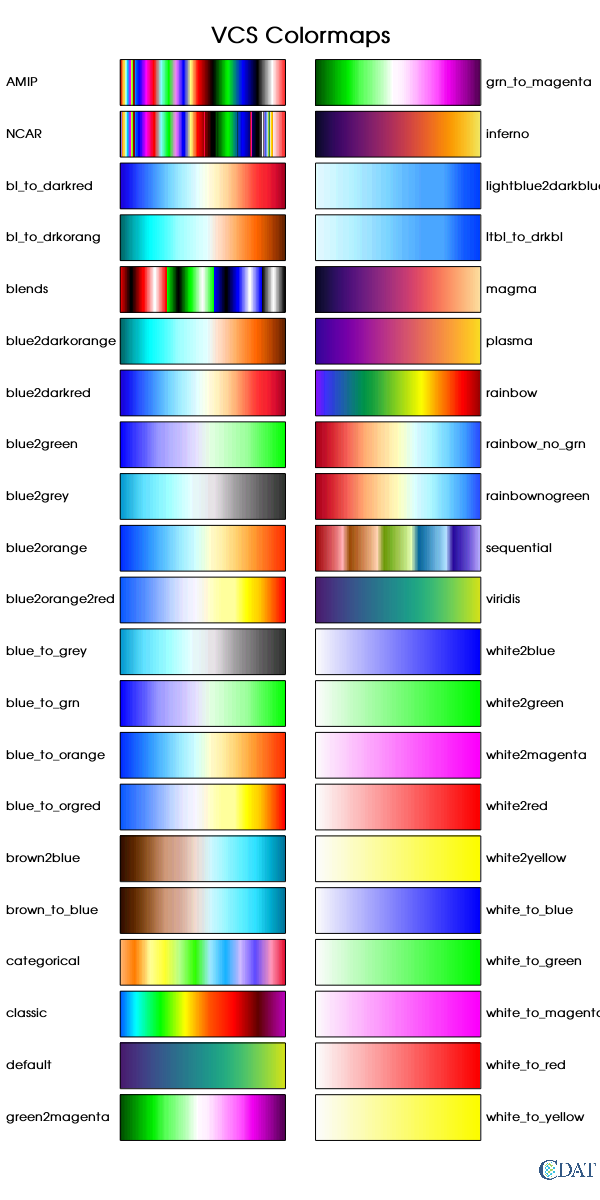

In [5]:
cmlst = v.listelements('colormap')
loadcmap = str
v = visualize(cmlst, v, loadcmap)

plot_title = v.createtext()
plot_title.string = 'VCS Colormaps'
plot_title.height = 15
plot_title.halign = 'center'
plot_title.valign = 'bottom'
plot_title.x = 0.5
plot_title.y = 0.96
v.plot(plot_title)

# Matplotlib colormaps in VCS
[Back to Top](#top)

- You can load and visualize [Matplotlib colormaps](#https://matplotlib.org/examples/color/colormaps_reference.html) in the VCS canvas.
- Use [vcs.colors.matplotlib2vcs](https://uvcdat.llnl.gov/docs/vcs/misc/colors.html) to convert 
- For now if same name is already being used in VCS, new name with tail `_000` is assigned, as showing below as "warning messages".
- You can also use `vcs.utils.loadmatplotlibcolormaps()` to bring all Matplotlib colormaps to VCS

/export/reshel3/anaconda52/envs/cdms2/lib/python2.7/site-packages/vcs-v8.0_54_gc8a83637-py3.7.egg/vcs/colors.py:43: UserWarning: inferno colormap name was already existing, your colormap name will be: inferno_mpl_000
/export/reshel3/anaconda52/envs/cdms2/lib/python2.7/site-packages/vcs-v8.0_54_gc8a83637-py3.7.egg/vcs/colors.py:43: UserWarning: magma colormap name was already existing, your colormap name will be: magma_mpl_000
/export/reshel3/anaconda52/envs/cdms2/lib/python2.7/site-packages/vcs-v8.0_54_gc8a83637-py3.7.egg/vcs/colors.py:43: UserWarning: plasma colormap name was already existing, your colormap name will be: plasma_mpl_000
/export/reshel3/anaconda52/envs/cdms2/lib/python2.7/site-packages/vcs-v8.0_54_gc8a83637-py3.7.egg/vcs/colors.py:43: UserWarning: rainbow colormap name was already existing, your colormap name will be: rainbow_mpl_000
/export/reshel3/anaconda52/envs/cdms2/lib/python2.7/site-packages/vcs-v8.0_54_gc8a83637-py3.7.egg/vcs/colors.py:43: UserWarning: viridis c

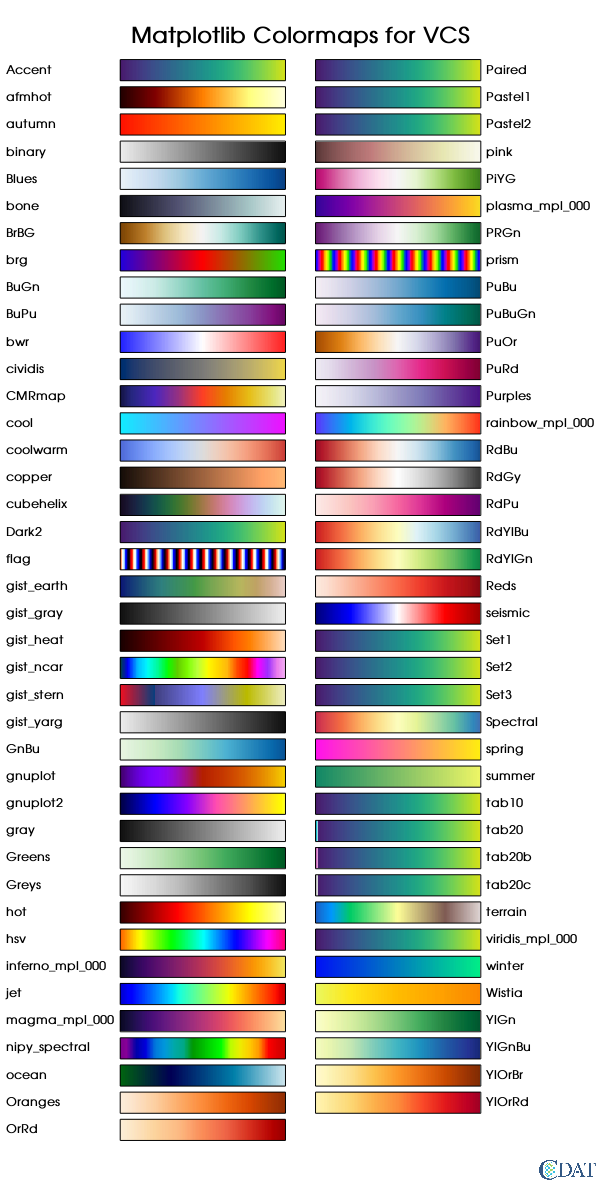

In [6]:
v.clear()

import matplotlib.pyplot as plt

# Get list of all available colormaps from matplotlib (except '_r' which is reversed one)
cmlst = [x for x in plt.colormaps() if not '_r' in x]
cmlst = sorted(cmlst, key=lambda s: s.lower()) # Sort as case-insensitive alphabet order

loadcmap = vcs.colors.matplotlib2vcs
v = visualize(cmlst, v, loadcmap)

plot_title.string = 'Matplotlib Colormaps for VCS'
v.plot(plot_title)